### Integração Numérica - Regra do Trapézio

Este notebook apresenta a implementação da Regra do Trapézio para cálculo de integrais definidas, incluindo o erro de aproximação simples e o erro generalizado.

In [11]:
import math
from integral import Integral
import matplotlib.pyplot as plt
import numpy as np

### Classe `IntegralTrapezio`

In [12]:
class IntegralTrapezio(Integral):
    def __init__(self, limite_inf: int = None, limite_sup: int = None, h: float = None, quant_pontos: int = None, x: list[float] = None, func_integral=None, func_derivada_integral=None) -> None:
        super().__init__(limite_inf, limite_sup, h, quant_pontos, x, func_integral, func_derivada_integral)

    def erro_generalizado(self):
        if self.func_derivada_integral is None:
            return None
        derivada_2_grau_limite_inf = self.func_derivada_integral(self.limite_inf)
        derivada_2_grau_limite_sup = self.func_derivada_integral(self.limite_sup)
        maior = self.saber_maior(derivada_2_grau_limite_inf, derivada_2_grau_limite_sup)
        return abs(-1 * self.quant_pontos * (math.pow(self.h, 3) / 12) / maior)

    def erro_simples(self):
        if self.func_derivada_integral is None:
            return None
        derivada_2_grau_limite_inf = self.func_derivada_integral(self.limite_inf)
        derivada_2_grau_limite_sup = self.func_derivada_integral(self.limite_sup)
        maior = self.saber_maior(derivada_2_grau_limite_inf, derivada_2_grau_limite_sup)
        return abs(-1 * (self.h ** 3 / 12) * maior)

    def integral(self):
        if self.func_integral:
            for x in self.x:
                self.y.append(self.func_integral(x))
        primeiro = self.y.pop(0)
        ultimo = self.y.pop()
        cte = self.h / 2
        soma = 0
        for y in self.y:
            soma += (2 * y)
        return cte * (primeiro + soma + ultimo)

### Exemplo de uso com pontos

In [13]:
pontos_x = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
int_trapezio_pontos = IntegralTrapezio(
    x=pontos_x,
    func_integral=lambda x: x * math.sqrt(x**2 + 1)
)
print(f'F(x) por pontos = {round(int_trapezio_pontos.integral(), 5)}')

TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'

### Exemplo de uso 1: \( f(x) = x \sqrt{x^2 + 1} \)

Erro Geral = 0.000471
Aproximação da integral = 0.61041


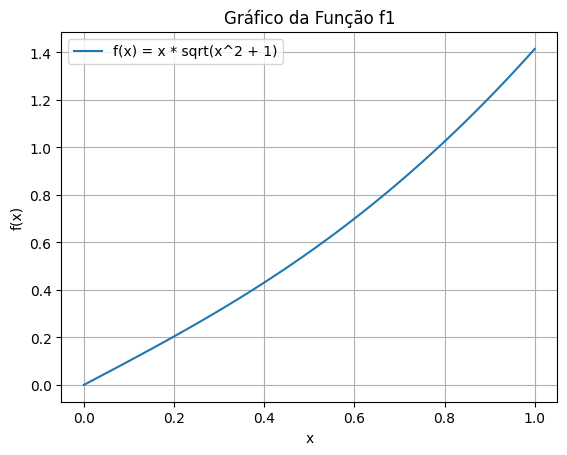

In [4]:
f1 = lambda x: x * math.sqrt(x**2 + 1)
df1 = lambda x: ((2 * math.pow(x, 3) + 3 * x)) / ((math.pow(x, 2) + 1) * (math.sqrt(x**2 + 1)))

int_trapezio_1 = IntegralTrapezio(
    limite_inf=0, 
    limite_sup=1, 
    h=0.1,
    func_integral=f1,
    func_derivada_integral=df1
)

print(f'Erro Geral = {int_trapezio_1.erro_generalizado():.6f}')
print(f'Aproximação da integral = {round(int_trapezio_1.integral(), 5)}')

x_vals = np.linspace(0, 1, 100)
y_vals = [f1(x) for x in x_vals]
plt.plot(x_vals, y_vals, label="f(x) = x * sqrt(x^2 + 1)")
plt.title("Gráfico da Função f1")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()